In [6]:
from torchvision.datasets import MNIST
import torch
from torch.utils.data import TensorDataset, Subset, ConcatDataset, Dataset


In [7]:
def torch_bernoulli_(p, size):
    return (torch.rand(size) < p).float()

def torch_xor_(a, b):
    return (a - b).abs()

def color_dataset(images, labels, environment):
        # # Subsample 2x for computational convenience
        # images = images.reshape((-1, 28, 28))[:, ::2, ::2]
        # Assign a binary label based on the digit
        print(images.shape)
        print(f'Olf labels: {labels}')
        labels = (labels < 5).float()
        print(f'New labels: {labels}')
        # Flip label with probability 0.25
        labels = torch_xor_(labels, torch_bernoulli_(0.25, len(labels)))
        print(f'Fliped labels: {labels}')
        # Assign a color based on the label; flip the color with probability e
        colors = torch_xor_(labels, torch_bernoulli_(environment, len(labels)))
        print(f'Color: {colors}')
        images = torch.stack([images, images, images], dim=1)
        print(f'Image shape: {images.shape}')
        # Apply the color to the image by zeroing out the other color channel
        images[torch.tensor(range(len(images))), (1 - colors).long(), :, :] *= 0

        x = images.float().div_(255.0)
        y = labels.view(-1).long()

        return TensorDataset(x, y)

In [5]:
MNIST('./DATA', download=True)

100%|██████████| 9912422/9912422 [00:01<00:00, 8113500.66it/s] 


Extracting ./DATA/MNIST/raw/train-images-idx3-ubyte.gz to ./DATA/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 17624864.52it/s]

Extracting ./DATA/MNIST/raw/train-labels-idx1-ubyte.gz to ./DATA/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 8686734.31it/s]


Extracting ./DATA/MNIST/raw/t10k-images-idx3-ubyte.gz to ./DATA/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 462122.28it/s]

Extracting ./DATA/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./DATA/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: ./DATA
    Split: Train

In [8]:
envs = [0.1, 0.2, 0.9]
original_dataset_train = MNIST('./DATA/MNIST/green', train=True, download=True)
original_dataset_test = MNIST('./DATA/MNIST/green', train=False, download=True)

original_images = torch.cat((original_dataset_train.data, original_dataset_test.data))
original_labels = torch.cat((original_dataset_train.targets, original_dataset_test.targets))

shuffle = torch.randperm(len(original_images))
original_images = original_images[shuffle]
original_labels = original_labels[shuffle]

datasets = []

for i in range(len(envs)):
    images = original_images[i::len(envs)]
    labels = original_labels[i::len(envs)]
    datasets.append(color_dataset(images, labels, envs[i]))

torch.Size([23334, 28, 28])
Olf labels: tensor([8, 5, 1,  ..., 4, 2, 7])
New labels: tensor([0., 0., 1.,  ..., 1., 1., 0.])
Fliped labels: tensor([0., 0., 1.,  ..., 0., 0., 1.])
Color: tensor([0., 0., 0.,  ..., 0., 0., 1.])
Image shape: torch.Size([23334, 3, 28, 28])
torch.Size([23333, 28, 28])
Olf labels: tensor([3, 5, 5,  ..., 9, 0, 9])
New labels: tensor([1., 0., 0.,  ..., 0., 1., 0.])
Fliped labels: tensor([0., 1., 0.,  ..., 0., 1., 0.])
Color: tensor([0., 1., 0.,  ..., 0., 1., 0.])
Image shape: torch.Size([23333, 3, 28, 28])
torch.Size([23333, 28, 28])
Olf labels: tensor([6, 1, 6,  ..., 2, 0, 2])
New labels: tensor([0., 1., 0.,  ..., 1., 1., 1.])
Fliped labels: tensor([0., 0., 0.,  ..., 0., 1., 0.])
Color: tensor([1., 1., 0.,  ..., 1., 0., 1.])
Image shape: torch.Size([23333, 3, 28, 28])


In [9]:
import matplotlib.pyplot as plt
import numpy as np

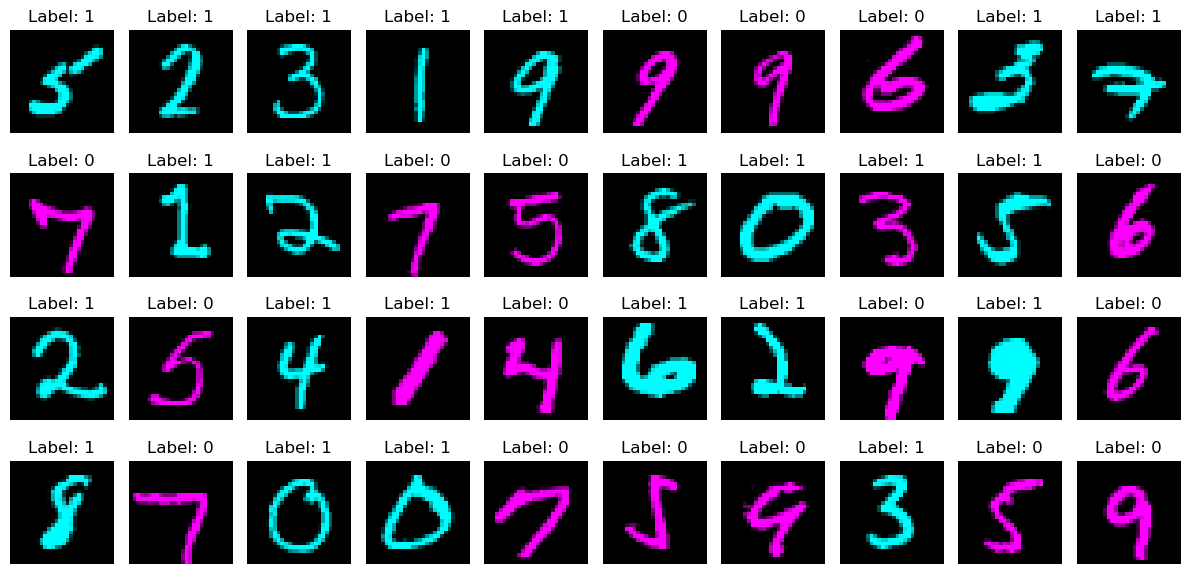

In [11]:
indices = np.random.randint(0, len(datasets[0]), size=40)

num_rows = 4
num_cols = 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    # Get the image and label corresponding to the random index
    index = indices[i]
    image, label = datasets[0][index]
    # ones = torch.zeros((1, 28, 28))
    # eimg = torch.vstack((image, ones))
    # Convert the PyTorch tensor to a NumPy array and transpose it
    image_np = image.permute(1, 2, 0).numpy()

    # Plot the image
    ax.imshow(image_np.squeeze(), cmap='gray')  # Assuming grayscale images
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

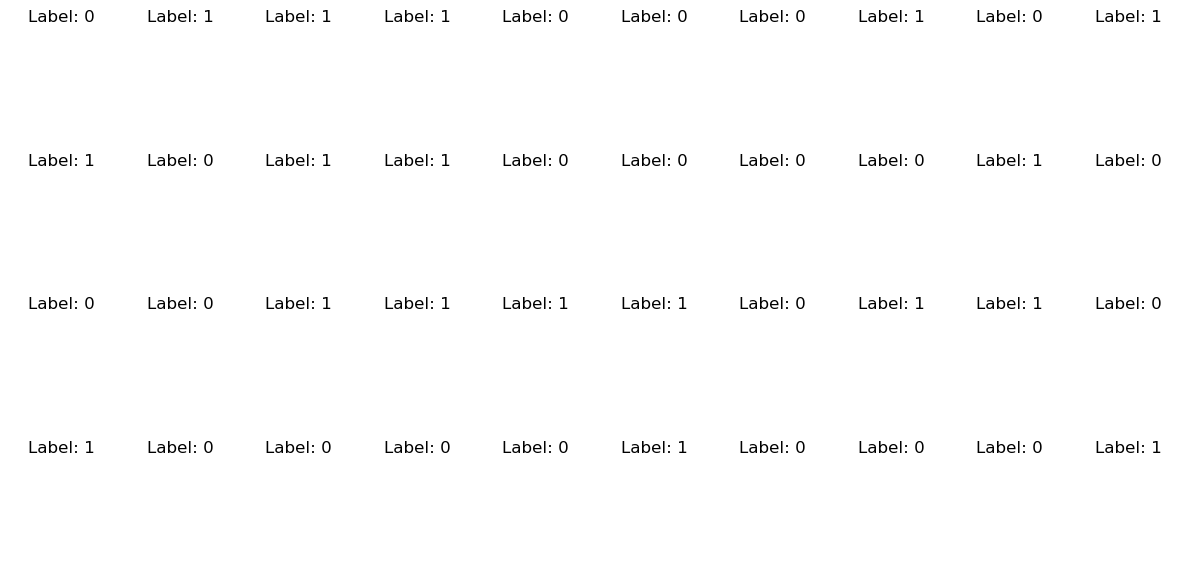

In [13]:
indices = np.random.randint(0, len(datasets[1]), size=40)

num_rows = 4
num_cols = 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    # Get the image and label corresponding to the random index
    index = indices[i]
    image, label = datasets[1][index]
    ones = torch.zeros((1, 28, 28))
    eimg = torch.vstack((image, ones))
    # Convert the PyTorch tensor to a NumPy array and transpose it
    image_np = eimg.permute(1, 2, 0).numpy()

    # Plot the image
    ax.imshow(image_np.squeeze(), cmap='gray')  # Assuming grayscale images
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

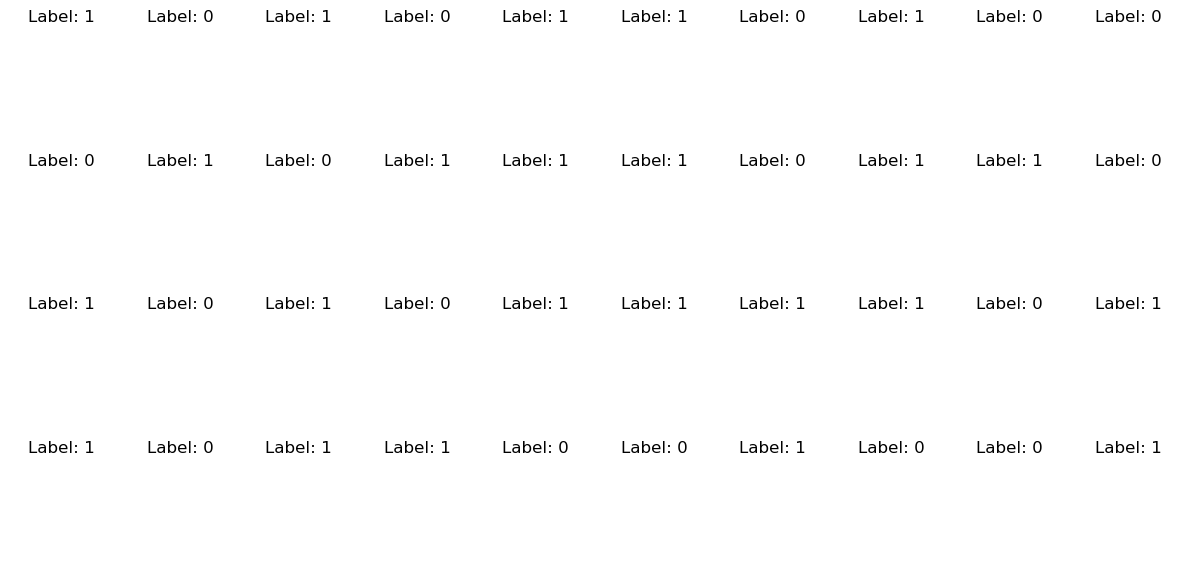

In [10]:
indices = np.random.randint(0, len(datasets[2]), size=40)

num_rows = 4
num_cols = 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    # Get the image and label corresponding to the random index
    index = indices[i]
    image, label = datasets[2][index]
    ones = torch.zeros((1, 28, 28))
    eimg = torch.vstack((image, ones))
    # Convert the PyTorch tensor to a NumPy array and transpose it
    image_np = eimg.permute(1, 2, 0).numpy()

    # Plot the image
    ax.imshow(image_np.squeeze(), cmap='gray')  # Assuming grayscale images
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()